In [143]:
import pandas as pd

dec_train_test = pd.read_csv('../DATASET/train_test/dec_train_test.csv')
nov_train_test = pd.read_csv('../DATASET/train_test/nov_train_test.csv')
oct_train_test = pd.read_csv('../DATASET/train_test/oct_train_test.csv')

In [144]:
dec_train_test

,lat,lon,year,month,precip_est,precip_obs,bias_dec,is_train
0,45.0,-20.0,1982,1,114.242190,158.107760,-43.865570,True
1,45.0,-19.0,1982,1,109.765625,138.565060,-28.799435,True
2,45.0,-18.0,1982,1,106.218750,122.867584,-16.648834,True
3,45.0,-17.0,1982,1,105.335940,109.741210,-4.405270,True
4,45.0,-16.0,1982,1,103.375000,106.399536,-3.024536,True
...,...,...,...,...,...,...,...,...
230251,20.0,16.0,2017,6,0.351885,3.776550,-3.424665,False
230252,20.0,17.0,2017,6,0.426104,3.719330,-3.293226,False
230253,20.0,18.0,2017,6,1.090166,3.147125,-2.056959,False
230254,20.0,19.0,2017,6,1.437823,0.000000,1.437823,False


In [145]:
dec_train_test = dec_train_test.drop(columns=['year', 'lat', 'lon'])
nov_train_test = nov_train_test.drop(columns=['year', 'lat', 'lon'])
oct_train_test = oct_train_test.drop(columns=['year', 'lat', 'lon'])

In [146]:
dec_average= dec_train_test.groupby(['month', 'is_train']).agg({'precip_est': 'mean', 'precip_obs': 'mean'}).reset_index()
oct_average= oct_train_test.groupby(['month', 'is_train']).agg({'precip_est': 'mean', 'precip_obs': 'mean'}).reset_index()
nov_average= nov_train_test.groupby(['month', 'is_train']).agg({'precip_est': 'mean', 'precip_obs': 'mean'}).reset_index()

In [147]:
dec_average

,month,is_train,precip_est,precip_obs
0,1,False,36.069351,32.960211
1,1,True,41.878524,35.329116
2,2,False,35.391791,23.658047
3,2,True,37.208368,27.515851
4,3,False,32.474639,29.645861
5,3,True,32.417786,27.881575
6,4,False,29.426884,21.934248
7,4,True,29.359863,21.329747
8,5,False,24.523373,11.646328
9,5,True,24.555590,14.499801


In [148]:
import numpy as np
import pandas as pd

# Your function definition remains the same
def eQM_porcentual_delta(ref, est):
    corrections = (ref - est) / est
    corrected_est = est * (1 + corrections)
    return corrected_est

In [149]:
import pandas as pd
import pandas as pd
from sklearn.metrics import mean_squared_error
from math import sqrt

def apply_correction_factors(df):
    correction_factors = {}
    # Calculate correction factors
    for month in sorted(df['month'].unique()):
        month_data = df[df['month'] == month]
        training_data = month_data[month_data['is_train']]
        if not training_data.empty:
            corrections = (training_data['precip_obs'] - training_data['precip_est']) / training_data['precip_est']
            correction_factors[month] = 1 + corrections.mean()
    
    # Apply correction factors
    corrected_precip_est = []
    for month in sorted(df['month'].unique()):
        month_data = df[df['month'] == month]
        if month in correction_factors:
            corrected_est = month_data['precip_est'] * correction_factors[month]
            corrected_precip_est.extend(corrected_est.values)
        else:
            corrected_precip_est.extend(month_data['precip_est'].values)
    
    df['corrected_precip_est'] = corrected_precip_est
    df['RMSE'] = [sqrt(mean_squared_error([row["corrected_precip_est"]], [row["precip_obs"]])) for _, row in df.iterrows()]


# Assuming dec_average, nov_average, oct_average are your DataFrames
apply_correction_factors(dec_average)
apply_correction_factors(nov_average)
apply_correction_factors(oct_average)

nov_average = pd.concat([nov_average[-2:], nov_average[:-2]]).reset_index(drop=True)
oct_average = pd.concat([oct_average[-4:], oct_average[:-4]]).reset_index(drop=True)

In [150]:
dec_average

,month,is_train,precip_est,precip_obs,corrected_precip_est,RMSE
0,1,False,36.069351,32.960211,30.428443,2.531768e+00
1,1,True,41.878524,35.329116,35.329116,0.000000e+00
2,2,False,35.391791,23.658047,26.172479,2.514432e+00
3,2,True,37.208368,27.515851,27.515851,0.000000e+00
4,3,False,32.474639,29.645861,27.930473,1.715388e+00
5,3,True,32.417786,27.881575,27.881575,3.552714e-15
6,4,False,29.426884,21.934248,21.378437,5.558108e-01
7,4,True,29.359863,21.329747,21.329747,3.552714e-15
8,5,False,24.523373,11.646328,14.480778,2.834449e+00
9,5,True,24.555590,14.499801,14.499801,1.776357e-15


In [151]:
nov_average

,month,is_train,precip_est,precip_obs,corrected_precip_est,RMSE
0,12,False,41.539811,35.417993,35.588512,1.705185e-01
1,12,True,43.950097,37.653482,37.653482,0.000000e+00
2,1,False,39.622456,42.234164,31.931632,1.030253e+01
3,1,True,40.550345,32.679415,32.679415,0.000000e+00
4,2,False,37.336726,26.031965,26.799366,7.674013e-01
5,2,True,37.389977,26.837589,26.837589,0.000000e+00
6,3,False,34.586336,27.310299,30.017290,2.706991e+00
7,3,True,32.894413,28.548879,28.548879,0.000000e+00
8,4,False,30.484277,23.216230,21.250900,1.965330e+00
9,4,True,30.071956,20.963466,20.963466,0.000000e+00


In [152]:
oct_average

,month,is_train,precip_est,precip_obs,corrected_precip_est,RMSE
0,11,False,39.689431,37.787759,45.533388,7.745630e+00
1,11,True,37.245809,42.729963,42.729963,0.000000e+00
2,12,False,41.489698,35.417993,36.854699,1.436705e+00
3,12,True,42.388941,37.653482,37.653482,0.000000e+00
4,1,False,38.758275,42.234164,30.799262,1.143490e+01
5,1,True,41.124290,32.679415,32.679415,0.000000e+00
6,2,False,38.449548,26.031965,27.638456,1.606491e+00
7,2,True,37.335412,26.837589,26.837589,0.000000e+00
8,3,False,38.192187,27.310299,32.207454,4.897155e+00
9,3,True,33.853782,28.548879,28.548879,3.552714e-15


In [153]:
# Corrected code
# For oct_average DataFrame
RMSE_bias_oct = oct_average.drop(columns=['month', 'precip_est', 'precip_obs', 'corrected_precip_est', 'is_train']) \
                            .loc[oct_average['is_train'] == False]

# For nov_average DataFrame
RMSE_bias_nov = nov_average.drop(columns=['month', 'precip_est', 'precip_obs', 'corrected_precip_est', 'is_train']) \
                            .loc[nov_average['is_train'] == False]

# For dec_average DataFrame
RMSE_bias_dec = dec_average.drop(columns=['precip_est', 'precip_obs', 'corrected_precip_est', 'is_train']) \
                            .loc[dec_average['is_train'] == False]


In [154]:
RMSE_bias_nov

,RMSE
0,0.170518
2,10.302532
4,0.767401
6,2.706991
8,1.965330
10,0.084683


In [155]:
RMSE_bias_dec

,month,RMSE
0,1,2.531768
2,2,2.514432
4,3,1.715388
6,4,0.555811
8,5,2.834449
10,6,1.798257


In [158]:
RMSE_bias_eQM = pd.concat([RMSE_bias_dec, RMSE_bias_nov, RMSE_bias_oct], ignore_index=True, axis=1)

RMSE_bias_eQM.columns = ['month', 'RMSE_dec', 'RMSE_nov', 'RMSE_oct']

In [159]:
RMSE_bias_eQM

,month,RMSE_dec,RMSE_nov,RMSE_oct
0,1,2.531768,0.170518,7.745630
2,2,2.514432,10.302532,1.436705
4,3,1.715388,0.767401,11.434902
6,4,0.555811,2.706991,1.606491
8,5,2.834449,1.965330,4.897155
10,6,1.798257,0.084683,1.596323


In [161]:
RMSE_bias_eQM.to_csv('../DATASET/RMSE_bias/RMSE_bias_eQM.csv', index=False)

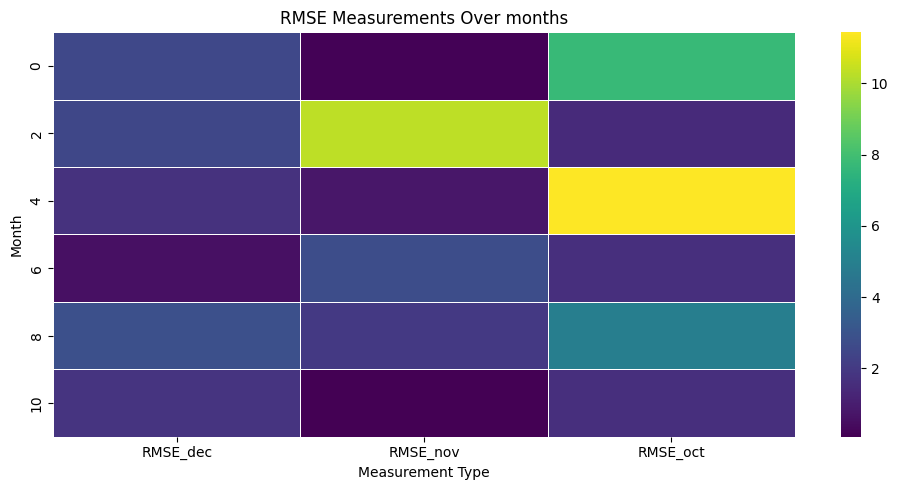

In [162]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# Your actual DataFrame loading or preparation code here
df = RMSE_bias_eQM
# Ensuring the 'year' and 'month' are combined into a single index for better visualization
df.drop(['month'], axis=1, inplace=True)

# Creating the heatmap
plt.figure(figsize=(10, 5))  # Adjust the figure size as necessary
sns.heatmap(df, annot=False, cmap='viridis', linewidths=.5)
plt.title('RMSE Measurements Over months')
plt.xlabel('Measurement Type')
plt.ylabel('Month')
plt.tight_layout()

plt.show()